### Reading file riket2023_åk9_np.xlsx and the sheets for the different subjects


In [9]:
import pandas as pd

# Read all sheets, skipping the first 7 rows
all_sheets = pd.read_excel("riket2023_åk9_np.xlsx", skiprows=8, sheet_name=None)     

# Extract individual DataFrames for each sheet 
english = all_sheets["Engelska"]
mathematics = all_sheets["Matematik"]
swedish = all_sheets["Svenska"]
swedish_second = all_sheets["Svenska som andraspråk"]

### Renaming columns 

In [10]:
# Function for renaming columns 
def rename_columns(df):
    # Define a list of new column names 
    new_columns = [
        'Plats',  
        'Huvudman',  
        'Totalt (A-F)',  
        'Flickor (A-F)',  
        'Pojkar (A-F)',  
        'Totalt (A-E)',  
        'Flickor (A-E)',  
        'Pojkar (A-E)',  
        'Totalt (poäng)',  
        'Flickor (poäng)', 
        'Pojkar (poäng)'
    ]
    
    # Rename the columns of the DataFrame using the list of new column names
    df.columns = new_columns
     # Filter out rows with Huvudman "Skolverket" only for the DataFrame for Swedish as second language
    if df is swedish_second and "Skolverket" in df["Huvudman"].values:
        df = df[df["Huvudman"] != "Skolverket"]
    # Return the DataFrame with updated column names
    return df

# Use the function to rename columns for each DataFrame
english = rename_columns(english)
mathematics = rename_columns(mathematics)
swedish = rename_columns(swedish)
swedish_second = rename_columns(swedish_second)

english


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


### Number of students who received the grade F

In [11]:
# Extract number of girls with grades A-F
girls_A_to_F = mathematics.loc[0, "Flickor (A-F)"]
#Extract the percentage of girls with grades A-E and convert to a decimal
girls_A_to_E = mathematics.loc[0, "Flickor (A-E)"] / 100  
# Calculate number of girls with F by subtracting the percentage of girls with grades A to E from 1 and multiplying by the total number of girls with grades A to F
girls_F = girls_A_to_F * (1 - girls_A_to_E)
rounded_girls_F =round(girls_F)

print("Antal flickor som fått betyget F:", rounded_girls_F)

# Extract number of girls with grades A-F
boys_A_to_F = mathematics.loc[0, "Pojkar (A-F)"]
#Extract the percentage of boys with grades A-E and convert to a decimal
boys_A_to_E = mathematics.loc[0, "Pojkar (A-E)"] / 100
# Calculate number of boys with F by subtracting the percentage of boys with grades A to E from 1 and multiplying by the total number of boys with grades A to F
boys_F = boys_A_to_F * (1 - boys_A_to_E)
rounded_boys_F =round(boys_F)

print("Antal pojkar som fått betyget F:", rounded_boys_F)

Antal flickor som fått betyget F: 5825
Antal pojkar som fått betyget F: 5798


### Bar chart of total points per subject 

C:\Users\annah\AppData\Local\Temp\ipykernel_4712\1010764550.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")])


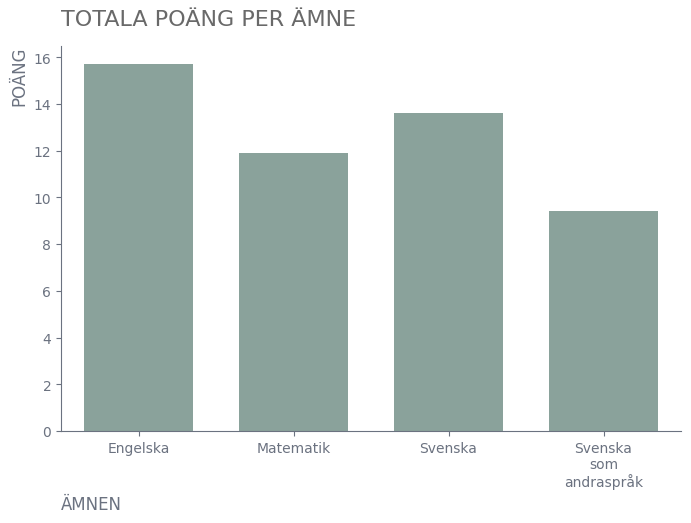

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define subjects
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
# List of points
points = [english.loc[0, "Totalt (poäng)"], 
          mathematics.loc[0, "Totalt (poäng)"], 
          swedish.loc[0, "Totalt (poäng)"], 
          swedish_second.loc[0, "Totalt (poäng)"]]

# Create figure and axis objects
fig, ax = plt.subplots()
# Create a bar plot
sns.barplot(x=subjects, y=points, color="#86A69D",width = 0.7, ax=ax) 
# Set x-axis tick labels 
            #ax.set_xticklabels(subjects)      #rotation=45
ax.set_xticklabels(subjects[:-1] + [subjects[-1].replace(" ", "\n")]) 
#Set x-axis label
plt.xlabel("ÄMNEN", loc="left", color="#6b7280", fontsize=12)
# Set y-axis label
plt.ylabel("POÄNG", loc="top", color="#6b7280", fontsize=12)
# Set title
plt.title("TOTALA POÄNG PER ÄMNE",  loc="left", pad=15, color="dimgray", fontsize=16) 
#Remove and change lines
ax.tick_params(axis="both", colors="#6b7280")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#6b7280")
ax.spines["bottom"].set_color("#6b7280")

fig.set_size_inches(8, 5)

plt.show()

In [14]:
# Define subjects
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
# Define dataframes 
dataframes = [english, mathematics, swedish, swedish_second]
# Define titles 
titles = ["Samtliga", "Kommunal", "Enskild", "Skolverket"]

